# Fake News Detection with Deep Learning

**This notebook demonstrates a comprehensive approach to Fake News Detection using Deep Learning techniques. It covers data preprocessing, model building, training, evaluation, and saving of the model and tokenizer. The objective is to create a reliable model that can classify news articles as either "Reliable" or "Fake," an essential task in combating misinformation online.**


## Libraries and Utilities Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
import pickle

In [3]:
# Import custom utility functions
from model_utils import (
    load_and_clean_data,
    preprocess_text,
    create_model,
    get_callbacks,
    plot_confusion_matrix
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data Loading & Preview

In [4]:
# Load and Clean data
file_path = '/content/drive/MyDrive/Data Science/train.csv'
X, y = load_and_clean_data(file_path)

In [5]:
X.head()

,id,news
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...


## Text Preprocessing

The `preprocess_text` function is used to clean and prepare the text data. The preprocessing steps include:

1. **Lowercasing**: Converts all text to lowercase to ensure uniformity and avoid case-sensitive discrepancies.
2. **Removing Punctuation**: Eliminates punctuation marks, which are not useful for text analysis.
3. **Tokenization**: Splits the text into individual words or tokens.
4. **Removing Stop Words**: Filters out common words that do not contribute to the meaning of the text.
5. **Stemming**: Reduces words to their base or root form to standardize them.

These steps help in normalizing the text and making it suitable for further processing and model training.


In [6]:
corpus = preprocess_text(X['news'].tolist())

## Tokenization and Padding

1. **Tokenization**: The `Tokenizer` is initialized with a vocabulary size of 5000 and is fitted on the preprocessed text corpus. This step converts the text into sequences of integers where each integer represents a unique word in the corpus.

2. **Conversion to Sequences**: The `texts_to_sequences` method transforms the corpus into sequences of integers.

3. **Padding**: The sequences are then padded to ensure uniform input length. Sequences shorter than 30 tokens are padded with zeros at the beginning (`pre` padding). This step helps in standardizing the input size for the model.

The resulting `embedded_docs` is an array of padded sequences ready for model training.

In [7]:
voc_size = 5000

# Fit the tokenizer on the corpus
tokenizer = Tokenizer(num_words=voc_size)
tokenizer.fit_on_texts(corpus)

In [8]:
# Convert the corpus to sequences
onehot_repr = tokenizer.texts_to_sequences(corpus)

In [9]:
# Pad the sequences
sent_length = 30
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  581 3094 3095]
 [   0    0    0 ...   46   70  729]
 [   0    0    0 ...  117  621   16]
 ...
 [   0    0    0 ... 1716  446 2117]
 [   0    0    0 ... 3186  163  415]
 [   0    0    0 ... 1910   42 1655]]


### Data Splitting

1. **Conversion to NumPy Arrays**: The padded sequences (`embedded_docs`) and labels (`y`) are converted to NumPy arrays, `X_final` and `y_final`.

2. **Train-Test Split**: The data is split into training and testing sets using a 70-30 split. This ensures that 30% of the data is used for testing while the remaining 70% is used for training and validation. The split is reproducible with `random_state=42`.

In [10]:
# Convert to numpy arrays
X_final = np.array(embedded_docs)
y_final = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

`X_train`, `X_test`, `y_train`, and `y_test` are now ready for model training and evaluation.

## Model Creation & Visualization

The model is initialized with a vocabulary size of 5000, 50 vector features, and a sequence length of 30. Its architecture is summarized and visualized.

In [11]:
# Create and compile the model
vector_features = 50
model = create_model(voc_size, vector_features, sent_length)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 50)            250000    
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 260657 (1018.19 KB)
Trainable params: 260657 (1018.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


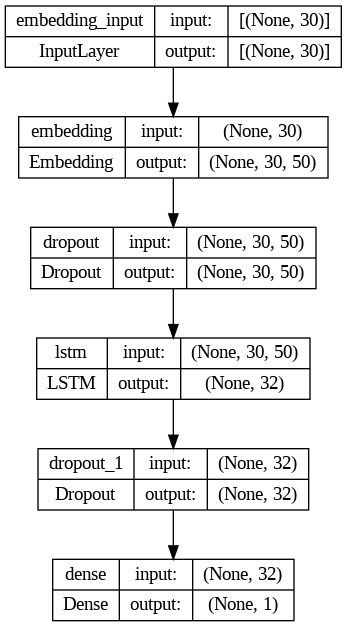

In [13]:
# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Model Training and Evaluation

The model is trained for 10 epochs with a batch size of 32 and validation split of 20%. After training, predictions are evaluated with Accuracy, Classification Report, and Confusion Matrix visualization.


In [14]:
# Train the model
callback = get_callbacks()
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=callback)

Epoch 1/10
320/320 [==============================] - 18s 40ms/step - loss: 0.2069 - accuracy: 0.9164 - val_loss: 0.0417 - val_accuracy: 0.9879
Epoch 2/10
320/320 [==============================] - 4s 12ms/step - loss: 0.0226 - accuracy: 0.9940 - val_loss: 0.0281 - val_accuracy: 0.9910
Epoch 3/10
320/320 [==============================] - 3s 9ms/step - loss: 0.0093 - accuracy: 0.9977 - val_loss: 0.0284 - val_accuracy: 0.9922
Epoch 4/10
320/320 [==============================] - 2s 8ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0282 - val_accuracy: 0.9930
Epoch 5/10
320/320 [==============================] - 2s 7ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0378 - val_accuracy: 0.9898
Epoch 6/10
320/320 [==============================] - 2s 7ms/step - loss: 8.2318e-04 - accuracy: 0.9999 - val_loss: 0.0362 - val_accuracy: 0.9898
Epoch 7/10
320/320 [==============================] - 3s 8ms/step - loss: 3.7830e-04 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 0.

In [15]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

172/172 [==============================] - 1s 2ms/step


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9907036091870215


In [17]:
report = classification_report(y_test, y_pred, target_names=['Reliable', 'Fake'])
print(report)

              precision    recall  f1-score   support

    Reliable       0.99      0.99      0.99      3107
        Fake       0.99      0.99      0.99      2379

    accuracy                           0.99      5486
   macro avg       0.99      0.99      0.99      5486
weighted avg       0.99      0.99      0.99      5486



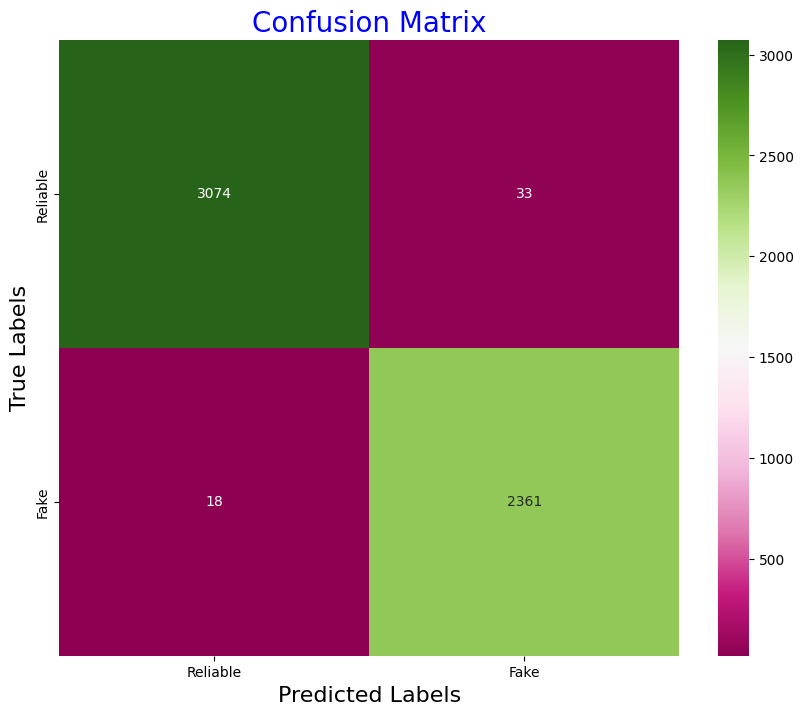

In [18]:
plot_confusion_matrix(y_test, y_pred, ['Reliable', 'Fake'])

## Saving Model and Tokenizer

The trained model and tokenizer are saved for future use: the Tokenizer is serialized into a pickle file, and the model is saved in HDF5 format.


In [19]:
# Save the tokenizer

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
# Save the trained model
model.save('fake_news_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
